In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [2]:
# 1 Загрузите данные из файла "база.csv"
data = pd.read_csv("drive/MyDrive/База.csv", encoding = 'windows-1251', sep = ';')
data

,УИД_Брони,ДатаБрони,ВремяБрони,ИсточникБрони,ВременнаяБронь,СледующийСтатус,Город,ВидПомещения,Тип,ПродаваемаяПлощадь,...,СтоимостьНаДатуБрони,ТипСтоимости,ВариантОплаты,ВариантОплатыДоп,СкидкаНаКвартиру,ФактическаяСтоимостьПомещения,СделкаАН,ИнвестиционныйПродукт,Привилегия,Статус лида (из CRM)
0,d192173f-fc14-11eb-9512-000c29ad50ac,13.08.2021,1:00:01,ручная,Да,Свободна,Ярославль,жилые помещения,"2,5к",72,...,4296100,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,4296100,Нет,Нет,Нет,S
1,43574a1f-fe8b-11eb-9512-000c29ad50ac,16.08.2021,4:12:46,ручная,Да,Свободна,Ярославль,жилые помещения,"3,5к","79,8",...,5279600,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,5279600,Да,Нет,Нет,F
2,0e7b7a81-fe97-11eb-9512-000c29ad50ac,16.08.2021,5:37:12,ручная,Да,Свободна,Ярославль,жилые помещения,"2,5к","65,4",...,4201400,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,4201400,Нет,Нет,Нет,S
3,c7041428-f90b-11eb-9512-000c29ad50ac,09.08.2021,4:17:35,ручная,Да,Свободна,Тюмень,жилые помещения,"2,5к","61,6",...,5414500,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,5414500,Нет,Нет,Нет,S
4,60090518-fe8b-11eb-9512-000c29ad50ac,16.08.2021,4:13:35,ручная,Да,Свободна,Ярославль,жилые помещения,"2,5к","65,4",...,4201400,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,4201400,Нет,Нет,Нет,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5514,945845a1-6269-11ec-951b-000c29ad50ac,21.12.2021,6:23:36,ручная,Нет,Свободна,Набережные Челны,жилые помещения,с,30,...,2373200,Стоимость при 100% оплате,Единовременная оплата,Ипотека,-94928,2468128,Нет,Нет,Нет,NaN
5515,4f131bfb-78f4-11ec-951d-000c29ad50ac,19.01.2022,10:52:06,ручная,Нет,NaN,Тюмень,кладовые,клад,"3,3",...,124700,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,124700,Нет,Нет,Нет,NaN
5516,74f0e184-78fc-11ec-951d-000c29ad50ac,19.01.2022,11:50:23,МП,Да,Свободна,Набережные Челны,жилые помещения,"1,5к","46,3",...,4499000,Стоимость при 100% оплате,Единовременная оплата,Ипотека,NaN,4499000,Нет,Нет,Нет,NaN
5517,12866ac0-7902-11ec-951d-000c29ad50ac,19.01.2022,12:30:40,МП,Нет,NaN,Пермь,жилые помещения,"2,5к","71,82",...,7422100,Стоимость при 100% оплате,Единовременная оплата,Ипотека,NaN,7422100,Да,Нет,Нет,NaN


In [3]:
# 2 Отфильтруйте данные, оставив только те, для которых «ВидПомещения» = «жилые помещения»
# В дальнейшем этот столбец использоваться не будет, его можно удалить
# Столбец «УИД_Брони» для нас также не представляет интереса, тоже удаляем
data = data[data['ВидПомещения'] == 'жилые помещения']
data.pop('ВидПомещения')
data.pop('УИД_Брони')
data

,ДатаБрони,ВремяБрони,ИсточникБрони,ВременнаяБронь,СледующийСтатус,Город,Тип,ПродаваемаяПлощадь,Этаж,СтоимостьНаДатуБрони,ТипСтоимости,ВариантОплаты,ВариантОплатыДоп,СкидкаНаКвартиру,ФактическаяСтоимостьПомещения,СделкаАН,ИнвестиционныйПродукт,Привилегия,Статус лида (из CRM)
0,13.08.2021,1:00:01,ручная,Да,Свободна,Ярославль,"2,5к",72,3.0,4296100,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,4296100,Нет,Нет,Нет,S
1,16.08.2021,4:12:46,ручная,Да,Свободна,Ярославль,"3,5к","79,8",2.0,5279600,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,5279600,Да,Нет,Нет,F
2,16.08.2021,5:37:12,ручная,Да,Свободна,Ярославль,"2,5к","65,4",18.0,4201400,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,4201400,Нет,Нет,Нет,S
3,09.08.2021,4:17:35,ручная,Да,Свободна,Тюмень,"2,5к","61,6",12.0,5414500,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,5414500,Нет,Нет,Нет,S
4,16.08.2021,4:13:35,ручная,Да,Свободна,Ярославль,"2,5к","65,4",18.0,4201400,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,4201400,Нет,Нет,Нет,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513,19.01.2022,10:24:14,ручная,Нет,NaN,Тюмень,"2,5к","61,7",14.0,6041700,Стоимость при 100% оплате,Единовременная оплата,NaN,185117,5856583,Нет,Нет,Нет,NaN
5514,21.12.2021,6:23:36,ручная,Нет,Свободна,Набережные Челны,с,30,14.0,2373200,Стоимость при 100% оплате,Единовременная оплата,Ипотека,-94928,2468128,Нет,Нет,Нет,NaN
5516,19.01.2022,11:50:23,МП,Да,Свободна,Набережные Челны,"1,5к","46,3",9.0,4499000,Стоимость при 100% оплате,Единовременная оплата,Ипотека,NaN,4499000,Нет,Нет,Нет,NaN
5517,19.01.2022,12:30:40,МП,Нет,NaN,Пермь,"2,5к","71,82",20.0,7422100,Стоимость при 100% оплате,Единовременная оплата,Ипотека,NaN,7422100,Да,Нет,Нет,NaN


In [4]:
# Отфильтруйте данные по признаку «СледующийСтатус», убрав неопределённые значения
# В оставшихся строчках замените значение «Продана» на 1, «Свободна» – на 0
data = data.copy()
data = data[(data['СледующийСтатус'] == 'Продана') | (data['СледующийСтатус'] == 'Свободна')]
data['СледующийСтатус'] = data['СледующийСтатус'].replace({'Продана': 1, 'Свободна': 0})
data

<ipython-input-4-dca4cb8d8cfd>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['СледующийСтатус'] = data['СледующийСтатус'].replace({'Продана': 1, 'Свободна': 0})


,ДатаБрони,ВремяБрони,ИсточникБрони,ВременнаяБронь,СледующийСтатус,Город,Тип,ПродаваемаяПлощадь,Этаж,СтоимостьНаДатуБрони,ТипСтоимости,ВариантОплаты,ВариантОплатыДоп,СкидкаНаКвартиру,ФактическаяСтоимостьПомещения,СделкаАН,ИнвестиционныйПродукт,Привилегия,Статус лида (из CRM)
0,13.08.2021,1:00:01,ручная,Да,0,Ярославль,"2,5к",72,3.0,4296100,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,4296100,Нет,Нет,Нет,S
1,16.08.2021,4:12:46,ручная,Да,0,Ярославль,"3,5к","79,8",2.0,5279600,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,5279600,Да,Нет,Нет,F
2,16.08.2021,5:37:12,ручная,Да,0,Ярославль,"2,5к","65,4",18.0,4201400,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,4201400,Нет,Нет,Нет,S
3,09.08.2021,4:17:35,ручная,Да,0,Тюмень,"2,5к","61,6",12.0,5414500,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,5414500,Нет,Нет,Нет,S
4,16.08.2021,4:13:35,ручная,Да,0,Ярославль,"2,5к","65,4",18.0,4201400,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,4201400,Нет,Нет,Нет,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5507,03.12.2021,5:10:13,МП,Нет,0,Набережные Челны,2к,"46,5",1.0,3494100,Стоимость при 100% оплате,Единовременная оплата,Ипотека,NaN,3494100,Нет,Нет,Нет,NaN
5512,22.12.2021,12:50:18,МП,Да,0,Набережные Челны,3к,"86,3",10.0,7557600,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,7557600,Нет,Нет,Нет,NaN
5514,21.12.2021,6:23:36,ручная,Нет,0,Набережные Челны,с,30,14.0,2373200,Стоимость при 100% оплате,Единовременная оплата,Ипотека,-94928,2468128,Нет,Нет,Нет,NaN
5516,19.01.2022,11:50:23,МП,Да,0,Набережные Челны,"1,5к","46,3",9.0,4499000,Стоимость при 100% оплате,Единовременная оплата,Ипотека,NaN,4499000,Нет,Нет,Нет,NaN


In [5]:
# 3 Проверьте тип данных и преобразуйте все данные к числовому типу
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3944 entries, 0 to 5518
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ДатаБрони                      3944 non-null   object 
 1   ВремяБрони                     3944 non-null   object 
 2   ИсточникБрони                  3944 non-null   object 
 3   ВременнаяБронь                 3944 non-null   object 
 4   СледующийСтатус                3944 non-null   int64  
 5   Город                          3944 non-null   object 
 6   Тип                            3900 non-null   object 
 7   ПродаваемаяПлощадь             3900 non-null   object 
 8   Этаж                           3944 non-null   float64
 9   СтоимостьНаДатуБрони           3944 non-null   object 
 10  ТипСтоимости                   3944 non-null   object 
 11  ВариантОплаты                  3941 non-null   object 
 12  ВариантОплатыДоп               2218 non-null   object

In [6]:
# Для тех полей, которые по смыслу являются числовыми (например, «ПродаваемаяПлощадь») – просто проверьте правильность типа
data['ПродаваемаяПлощадь'] = data['ПродаваемаяПлощадь'].str.replace(',', '.').astype(float)
data['СтоимостьНаДатуБрони'] = data['СтоимостьНаДатуБрони'].str.replace(',', '.').astype(float)
data['СкидкаНаКвартиру'] = data['СкидкаНаКвартиру'].str.replace(',', '.').astype(float)
data['ФактическаяСтоимостьПомещения'] = data['ФактическаяСтоимостьПомещения'].str.replace(',', '.').astype(float)

In [7]:
# Для бинарных признаков (например, «ИсточникБрони») выполните кодирование (один вариант закодируйте 0, другой 1)
data['ИсточникБрони'] = data['ИсточникБрони'].replace({'ручная': 1, 'МП': 0})
data['ВременнаяБронь'] = data['ВременнаяБронь'].replace({'Да': 1, 'Нет': 0})
data['ТипСтоимости'] = data['ТипСтоимости'].replace({'Стоимость при 100% оплате': 1, 'Стоимость в рассрочку': 0})
data['ВариантОплаты'] = data['ВариантОплаты'].replace({'Единовременная оплата': 1, 'Оплата в рассрочку': 0})
data['СделкаАН'] = data['СделкаАН'].replace({'Да': 1, 'Нет': 0})
data['ИнвестиционныйПродукт'] = data['ИнвестиционныйПродукт'].replace({'Да': 1, 'Нет': 0})
data['Привилегия'] = data['Привилегия'].replace({'Да': 1, 'Нет': 0})

<ipython-input-7-b818f1bf28ed>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['ИсточникБрони'] = data['ИсточникБрони'].replace({'ручная': 1, 'МП': 0})
<ipython-input-7-b818f1bf28ed>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['ВременнаяБронь'] = data['ВременнаяБронь'].replace({'Да': 1, 'Нет': 0})
<ipython-input-7-b818f1bf28ed>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3944 entries, 0 to 5518
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ДатаБрони                      3944 non-null   object 
 1   ВремяБрони                     3944 non-null   object 
 2   ИсточникБрони                  3944 non-null   int64  
 3   ВременнаяБронь                 3944 non-null   int64  
 4   СледующийСтатус                3944 non-null   int64  
 5   Город                          3944 non-null   object 
 6   Тип                            3900 non-null   object 
 7   ПродаваемаяПлощадь             3900 non-null   float64
 8   Этаж                           3944 non-null   float64
 9   СтоимостьНаДатуБрони           3944 non-null   float64
 10  ТипСтоимости                   3944 non-null   int64  
 11  ВариантОплаты                  3941 non-null   float64
 12  ВариантОплатыДоп               2218 non-null   object

In [9]:
# Для категориальных не бинарных признаков (например, «Город») выполните one-hot кодирование
dum = pd.get_dummies(data['Город'], dtype = 'int64')
data = pd.concat([data, dum], axis = 1)
data.pop('Город')
data['Статус лида (из CRM)'] = data['Статус лида (из CRM)'].fillna('N')
dum = pd.get_dummies(data['Статус лида (из CRM)'], dtype = 'int64')
data = pd.concat([data, dum], axis = 1)
data.pop('Статус лида (из CRM)')
data

,ДатаБрони,ВремяБрони,ИсточникБрони,ВременнаяБронь,СледующийСтатус,Тип,ПродаваемаяПлощадь,Этаж,СтоимостьНаДатуБрони,ТипСтоимости,...,Сочи,Тверь,Тюмень,Уфа,Хабаровск,Ярославль,F,N,P,S
0,13.08.2021,1:00:01,1,1,0,"2,5к",72.0,3.0,4296100.0,1,...,0,0,0,0,0,1,0,0,0,1
1,16.08.2021,4:12:46,1,1,0,"3,5к",79.8,2.0,5279600.0,1,...,0,0,0,0,0,1,1,0,0,0
2,16.08.2021,5:37:12,1,1,0,"2,5к",65.4,18.0,4201400.0,1,...,0,0,0,0,0,1,0,0,0,1
3,09.08.2021,4:17:35,1,1,0,"2,5к",61.6,12.0,5414500.0,1,...,0,0,1,0,0,0,0,0,0,1
4,16.08.2021,4:13:35,1,1,0,"2,5к",65.4,18.0,4201400.0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5507,03.12.2021,5:10:13,0,0,0,2к,46.5,1.0,3494100.0,1,...,0,0,0,0,0,0,0,1,0,0
5512,22.12.2021,12:50:18,0,1,0,3к,86.3,10.0,7557600.0,1,...,0,0,0,0,0,0,0,1,0,0
5514,21.12.2021,6:23:36,1,0,0,с,30.0,14.0,2373200.0,1,...,0,0,0,0,0,0,0,1,0,0
5516,19.01.2022,11:50:23,0,1,0,"1,5к",46.3,9.0,4499000.0,1,...,0,0,0,0,0,0,0,1,0,0


In [10]:
# Обратите внимание на поле «Тип». По смыслу оно числовое (количество комнат), но напрямую сконвертировать его в числовой тип мешает буковка «к» в конце
# Напишите вручную преобразование, которое удаляет букву «к» в конце и конвертирует то, что осталось, в число
# Если это невозможно (среди данных вам встретится еще вариант, когда в этом поле записано просто «с») – просто пока оставьте поле пустым (NaN)
data['Тип'] = data['Тип'].str.replace('к', '').replace('с', 'NaN')
data['Тип'] = data['Тип'].str.replace(',', '.').astype(float)
data

,ДатаБрони,ВремяБрони,ИсточникБрони,ВременнаяБронь,СледующийСтатус,Тип,ПродаваемаяПлощадь,Этаж,СтоимостьНаДатуБрони,ТипСтоимости,...,Сочи,Тверь,Тюмень,Уфа,Хабаровск,Ярославль,F,N,P,S
0,13.08.2021,1:00:01,1,1,0,2.5,72.0,3.0,4296100.0,1,...,0,0,0,0,0,1,0,0,0,1
1,16.08.2021,4:12:46,1,1,0,3.5,79.8,2.0,5279600.0,1,...,0,0,0,0,0,1,1,0,0,0
2,16.08.2021,5:37:12,1,1,0,2.5,65.4,18.0,4201400.0,1,...,0,0,0,0,0,1,0,0,0,1
3,09.08.2021,4:17:35,1,1,0,2.5,61.6,12.0,5414500.0,1,...,0,0,1,0,0,0,0,0,0,1
4,16.08.2021,4:13:35,1,1,0,2.5,65.4,18.0,4201400.0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5507,03.12.2021,5:10:13,0,0,0,2.0,46.5,1.0,3494100.0,1,...,0,0,0,0,0,0,0,1,0,0
5512,22.12.2021,12:50:18,0,1,0,3.0,86.3,10.0,7557600.0,1,...,0,0,0,0,0,0,0,1,0,0
5514,21.12.2021,6:23:36,1,0,0,NaN,30.0,14.0,2373200.0,1,...,0,0,0,0,0,0,0,1,0,0
5516,19.01.2022,11:50:23,0,1,0,1.5,46.3,9.0,4499000.0,1,...,0,0,0,0,0,0,0,1,0,0


In [11]:
# 4 Проверьте, есть ли по каким-либо признакам отсутствующие данные
# Отсутствующие данные в поле «СкидкаНаКвартиру» замените на 0
data['СкидкаНаКвартиру'] = data['СкидкаНаКвартиру'].fillna(0)
data['СкидкаНаКвартиру']

,СкидкаНаКвартиру
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
5507,0.0
5512,0.0
5514,-94928.0
5516,0.0


In [12]:
# Отсутствующие данные в полях «Тип» и «ПродаваемаяПлощадь» замените на медианное значение, вычисленное по всему набору данных
mType = data['Тип'].mean().round(1)
mSquare = data['ПродаваемаяПлощадь'].mean().round(1)
print(mType, mSquare)
data['Тип'] = data['Тип'].fillna(mType)
data['ПродаваемаяПлощадь'] = data['ПродаваемаяПлощадь'].fillna(mSquare)
data

2.1 60.4


,ДатаБрони,ВремяБрони,ИсточникБрони,ВременнаяБронь,СледующийСтатус,Тип,ПродаваемаяПлощадь,Этаж,СтоимостьНаДатуБрони,ТипСтоимости,...,Сочи,Тверь,Тюмень,Уфа,Хабаровск,Ярославль,F,N,P,S
0,13.08.2021,1:00:01,1,1,0,2.5,72.0,3.0,4296100.0,1,...,0,0,0,0,0,1,0,0,0,1
1,16.08.2021,4:12:46,1,1,0,3.5,79.8,2.0,5279600.0,1,...,0,0,0,0,0,1,1,0,0,0
2,16.08.2021,5:37:12,1,1,0,2.5,65.4,18.0,4201400.0,1,...,0,0,0,0,0,1,0,0,0,1
3,09.08.2021,4:17:35,1,1,0,2.5,61.6,12.0,5414500.0,1,...,0,0,1,0,0,0,0,0,0,1
4,16.08.2021,4:13:35,1,1,0,2.5,65.4,18.0,4201400.0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5507,03.12.2021,5:10:13,0,0,0,2.0,46.5,1.0,3494100.0,1,...,0,0,0,0,0,0,0,1,0,0
5512,22.12.2021,12:50:18,0,1,0,3.0,86.3,10.0,7557600.0,1,...,0,0,0,0,0,0,0,1,0,0
5514,21.12.2021,6:23:36,1,0,0,2.1,30.0,14.0,2373200.0,1,...,0,0,0,0,0,0,0,1,0,0
5516,19.01.2022,11:50:23,0,1,0,1.5,46.3,9.0,4499000.0,1,...,0,0,0,0,0,0,0,1,0,0


In [13]:
# Что делать с полем «ВариантОплатыДоп» решите самостоятельно
# допустимо также совсем убрать этот столбец из рассмотрения
data.pop('ВариантОплатыДоп');

In [14]:
# По всем остальным полям примите решение самостоятельно
# Если отсутствующих данных не много, то удалите соответствующие строки
data.pop('ДатаБрони')
data.pop('ВремяБрони')
data = data.dropna(subset = ['ВариантОплаты'])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3941 entries, 0 to 5518
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ИсточникБрони                  3941 non-null   int64  
 1   ВременнаяБронь                 3941 non-null   int64  
 2   СледующийСтатус                3941 non-null   int64  
 3   Тип                            3941 non-null   float64
 4   ПродаваемаяПлощадь             3941 non-null   float64
 5   Этаж                           3941 non-null   float64
 6   СтоимостьНаДатуБрони           3941 non-null   float64
 7   ТипСтоимости                   3941 non-null   int64  
 8   ВариантОплаты                  3941 non-null   float64
 9   СкидкаНаКвартиру               3941 non-null   float64
 10  ФактическаяСтоимостьПомещения  3941 non-null   float64
 11  СделкаАН                       3941 non-null   int64  
 12  ИнвестиционныйПродукт          3941 non-null   int64 

In [16]:
# 5 Дополнение данных
# Добавьте новый признак «Цена за квадратный метр»
# Он должен вычисляться на основе значений признаков «ФактическаяСтоимостьПомещения» и «ПродаваемаяПлощадь»
data = data.copy()
data['Цена за квадратный метр'] = data['ФактическаяСтоимостьПомещения'] / data['ПродаваемаяПлощадь']
data[['ФактическаяСтоимостьПомещения', 'ПродаваемаяПлощадь', 'Цена за квадратный метр']]

,ФактическаяСтоимостьПомещения,ПродаваемаяПлощадь,Цена за квадратный метр
0,4296100.0,72.0,59668.055556
1,5279600.0,79.8,66160.401003
2,4201400.0,65.4,64241.590214
3,5414500.0,61.6,87897.727273
4,4201400.0,65.4,64241.590214
...,...,...,...
5507,3494100.0,46.5,75141.935484
5512,7557600.0,86.3,87573.580533
5514,2468128.0,30.0,82270.933333
5516,4499000.0,46.3,97170.626350


In [17]:
# Добавьте новый признак «Скидка в процентах», на основе значений «ФактическаяСтоимостьПомещения» и «СкидкаНаКвартиру»
data['Скидка в процентах'] = data['СкидкаНаКвартиру'] / (data['ФактическаяСтоимостьПомещения'] + data['СкидкаНаКвартиру'])
data[['ФактическаяСтоимостьПомещения', 'СкидкаНаКвартиру', 'Скидка в процентах']]

,ФактическаяСтоимостьПомещения,СкидкаНаКвартиру,Скидка в процентах
0,4296100.0,0.0,0.00
1,5279600.0,0.0,0.00
2,4201400.0,0.0,0.00
3,5414500.0,0.0,0.00
4,4201400.0,0.0,0.00
...,...,...,...
5507,3494100.0,0.0,0.00
5512,7557600.0,0.0,0.00
5514,2468128.0,-94928.0,-0.04
5516,4499000.0,0.0,0.00


In [18]:
# 6 Выполните нормализацию. Можете самостоятельно выбрать способ нормализации
# «По умолчанию» предлагается выполнить минимаксную нормализацию и привести все значения к диапазону [0;1],
# кроме признака «СкидкаНаКвартиру» - его логичнее приводить к диапазону [-0,5; 0,5]
sc = StandardScaler()
ndata = pd.DataFrame(sc.fit_transform(data[['СкидкаНаКвартиру']]), columns = ['СкидкаНаКвартиру'])
sc = MinMaxScaler()
pdata = pd.DataFrame(sc.fit_transform(data), columns = data.columns)
pdata.pop('СкидкаНаКвартиру')
ndata = pd.concat([ndata, pdata], axis = 1)
ndata

,СкидкаНаКвартиру,ИсточникБрони,ВременнаяБронь,СледующийСтатус,Тип,ПродаваемаяПлощадь,Этаж,СтоимостьНаДатуБрони,ТипСтоимости,ВариантОплаты,...,Тюмень,Уфа,Хабаровск,Ярославль,F,N,P,S,Цена за квадратный метр,Скидка в процентах
0,-0.235597,1.0,1.0,0.0,0.428571,0.397864,0.083333,0.104727,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.036205,0.373058
1,-0.235597,1.0,1.0,0.0,0.714286,0.467290,0.041667,0.141803,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.051669,0.373058
2,-0.235597,1.0,1.0,0.0,0.428571,0.339119,0.708333,0.101157,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.047099,0.373058
3,-0.235597,1.0,1.0,0.0,0.428571,0.305296,0.458333,0.146888,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.103442,0.373058
4,-0.235597,1.0,1.0,0.0,0.428571,0.339119,0.708333,0.101157,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.047099,0.373058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,-0.235597,0.0,0.0,0.0,0.285714,0.170895,0.000000,0.074494,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.073061,0.373058
3937,-0.235597,0.0,1.0,0.0,0.571429,0.525145,0.375000,0.227677,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.102670,0.373058
3938,-1.452823,1.0,0.0,0.0,0.314286,0.024032,0.541667,0.032239,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.090041,0.186529
3939,-0.235597,0.0,1.0,0.0,0.142857,0.169114,0.333333,0.112376,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.125528,0.373058


In [19]:
# 7 Проверьте датасет на сбалансированность (количество строк со значением целевого признака 0 и со значением 1)
# Является ли датасет сбалансированным?
ndata[ndata['СледующийСтатус'] == 0.0]

,СкидкаНаКвартиру,ИсточникБрони,ВременнаяБронь,СледующийСтатус,Тип,ПродаваемаяПлощадь,Этаж,СтоимостьНаДатуБрони,ТипСтоимости,ВариантОплаты,...,Тюмень,Уфа,Хабаровск,Ярославль,F,N,P,S,Цена за квадратный метр,Скидка в процентах
0,-0.235597,1.0,1.0,0.0,0.428571,0.397864,0.083333,0.104727,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.036205,0.373058
1,-0.235597,1.0,1.0,0.0,0.714286,0.467290,0.041667,0.141803,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.051669,0.373058
2,-0.235597,1.0,1.0,0.0,0.428571,0.339119,0.708333,0.101157,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.047099,0.373058
3,-0.235597,1.0,1.0,0.0,0.428571,0.305296,0.458333,0.146888,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.103442,0.373058
4,-0.235597,1.0,1.0,0.0,0.428571,0.339119,0.708333,0.101157,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.047099,0.373058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,-0.235597,0.0,0.0,0.0,0.285714,0.170895,0.000000,0.074494,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.073061,0.373058
3937,-0.235597,0.0,1.0,0.0,0.571429,0.525145,0.375000,0.227677,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.102670,0.373058
3938,-1.452823,1.0,0.0,0.0,0.314286,0.024032,0.541667,0.032239,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.090041,0.186529
3939,-0.235597,0.0,1.0,0.0,0.142857,0.169114,0.333333,0.112376,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.125528,0.373058


In [20]:
ndata[ndata['СледующийСтатус'] == 1.0]

,СкидкаНаКвартиру,ИсточникБрони,ВременнаяБронь,СледующийСтатус,Тип,ПродаваемаяПлощадь,Этаж,СтоимостьНаДатуБрони,ТипСтоимости,ВариантОплаты,...,Тюмень,Уфа,Хабаровск,Ярославль,F,N,P,S,Цена за квадратный метр,Скидка в процентах
12,-0.235597,1.0,0.0,1.0,0.714286,0.569381,0.250000,0.320903,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.155848,0.373058
13,-3.711043,1.0,0.0,1.0,0.142857,0.175345,0.083333,0.070494,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.079515,0.000000
14,-10.992259,1.0,0.0,1.0,0.714286,0.496662,0.708333,0.438444,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.294993,0.075544
15,0.823553,0.0,0.0,1.0,0.000000,0.124611,0.750000,0.091277,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.116506,0.470838
16,-4.166195,1.0,0.0,1.0,0.285714,0.219849,0.625000,0.087221,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.083635,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919,1.903411,0.0,0.0,1.0,0.571429,0.520694,0.166667,0.221978,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.095058,0.478089
3920,1.186882,0.0,0.0,1.0,0.142857,0.157543,0.333333,0.084054,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.086578,0.511094
3921,-0.235597,0.0,0.0,1.0,0.000000,0.064976,0.333333,0.049365,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.088727,0.373058
3922,-0.235597,0.0,0.0,1.0,0.428571,0.353360,0.291667,0.181491,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.119199,0.373058


In [21]:
# 8 Сформируйте список факторных признаков и целевой признак
x = ndata.drop('СледующийСтатус', axis = 1)
y = ndata['СледующийСтатус']

In [22]:
# 9 Выполните разбиение датасета на обучающую и тестовую выборки
# При формировании обучающей и тестовой выборок строки из исходного датафрейма должны выбираться в случайном порядке
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [23]:
# 10 Из библиотеки sklearn.neighbors возьмите алгоритм классификации KNN (KNeighborsClassifier)
# Постройте (обучите) модель, для параметров используйте значения по умолчанию
modelKN = KNeighborsClassifier()
modelKN.fit(x_train, y_train)

KNeighborsClassifier()

In [24]:
# 11 Из библиотеки sklearn.tree возьмите алгоритм классификации на основе деревьев решений (DecisionTreeClassifier)
# Постройте (обучите) модель, для параметров используйте значения по умолчанию
modelT = DecisionTreeClassifier()
modelT.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
# 12 Получите векторы прогнозных значений целевой переменной на обучающей и на тестовой выборках для каждой из моделей
y1_model = modelKN.predict(x_train)
y1_pred = modelKN.predict(x_test)
y2_model = modelT.predict(x_train)
y2_pred = modelT.predict(x_test)

In [26]:
# 13 Посчитайте показатели качества: «F-мера», точность (Precision) и полнота (Recall) на обучающей и на тестовой выборках для каждой из моделей
print('Модель с алгоритмом KNN')
print('\nF-мера на обучающей выборке =', f1_score(y_train, y1_model))
print('F-мера на тестовой выборке =', f1_score(y_test, y1_pred))

print('\nPrecision на обучающей выборке =', precision_score(y_train, y1_model))
print('Precision на тестовой выборке = ', precision_score(y_test, y1_pred))

print('\nRecall на обучающей выборке =', recall_score(y_train, y1_model))
print('Recall на тестовой выборке =', recall_score(y_test, y1_pred))

print('\n\nМодель с алгоритмом DecisionTree')
print('\nF-мера на обучающей выборке =', f1_score(y_train, y2_model))
print('F-мера на тестовой выборке =', f1_score(y_test, y2_pred))

print('\nPrecision на обучающей выборке =', precision_score(y_train, y2_model))
print('Precision на тестовой выборке =', precision_score(y_test, y2_pred))

print('\nRecall на обучающей выборке =', recall_score(y_train, y2_model))

Модель с алгоритмом KNN

F-мера на обучающей выборке = 0.8603104212860311
F-мера на тестовой выборке = 0.7637231503579952

Precision на обучающей выборке = 0.8848346636259977
Precision на тестовой выборке =  0.7655502392344498

Recall на обучающей выборке = 0.837108953613808
Recall на тестовой выборке = 0.7619047619047619


Модель с алгоритмом DecisionTree

F-мера на обучающей выборке = 0.9907457811649428
F-мера на тестовой выборке = 0.7554479418886199

Precision на обучающей выборке = 1.0
Precision на тестовой выборке = 0.7684729064039408

Recall на обучающей выборке = 0.9816612729234089
Recall на тестовой выборке = 0.7428571428571429


14.Сделайте вывод о том, насколько хорошо удалось решить задачу прогнозирования. Какая модель оказалась лучше? Дайте интерпретацию полученных значений Precision и Recall.

DesicionTree лучше на обучающей выборке, но хуже на тестовой

KNN лучше на тестовой, но хуже на обучающей

Вывод: KNN модель лучше, поскольку нам важнее точность предсказания на тестовой выборке

Precision (точность) — это доля объектов, названных классификатором положительными и при этом действительно являющихся положительными.

Recall (полнота) показывает, какую долю объектов положительного класса из всех объектов положительного класса нашёл алгоритм.

Формулы:

Precision = TP / (TP + TF)

Recall = TP / (TP + FN)

TP - True Positive

TF - False Positive

TF - True Negative

FN - False Negative

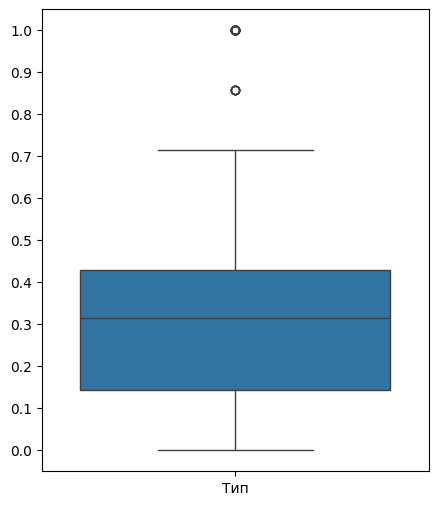

In [29]:
# 15 Постройте boxplot («ящик с усами») для всех числовых признаков
# Отфильтруйте исходные данные, удалив выбросы
# Пересоздайте тестовую и обучающую выборки, переобучите модели
# Посчитайте показатели качества
# Как они изменились?
plt.rcParams['figure.figsize'] = 5, 6
sns.boxplot(ndata[['Тип']])
plt.yticks(np.arange(0, 1.1, 0.1));

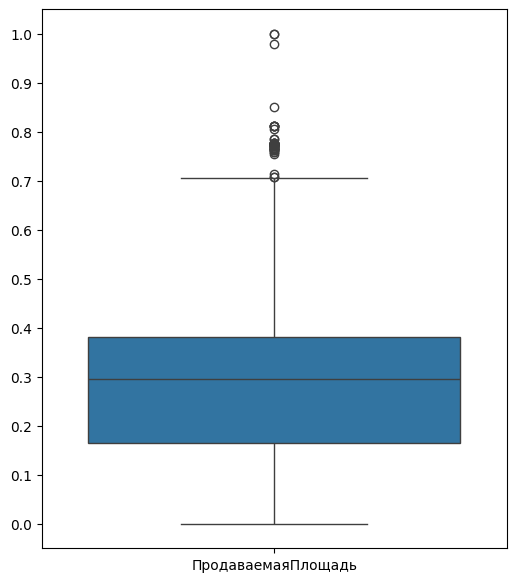

In [30]:
plt.rcParams['figure.figsize'] = 6, 7
sns.boxplot(ndata[['ПродаваемаяПлощадь']])
plt.yticks(np.arange(0, 1.1, 0.1));

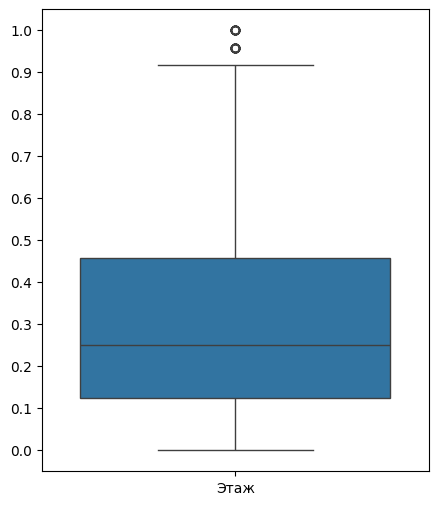

In [32]:
plt.rcParams['figure.figsize'] = 5, 6
sns.boxplot(ndata[['Этаж']])
plt.yticks(np.arange(0, 1.1, 0.1));

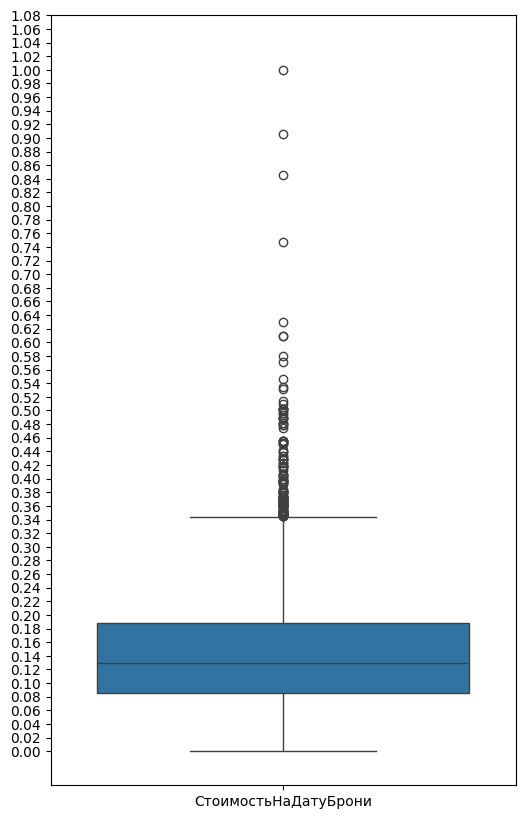

In [ ]:
plt.rcParams['figure.figsize'] = 6, 10
sns.boxplot(ndata[['СтоимостьНаДатуБрони']])
plt.yticks(np.arange(0, 1.1, 0.02));

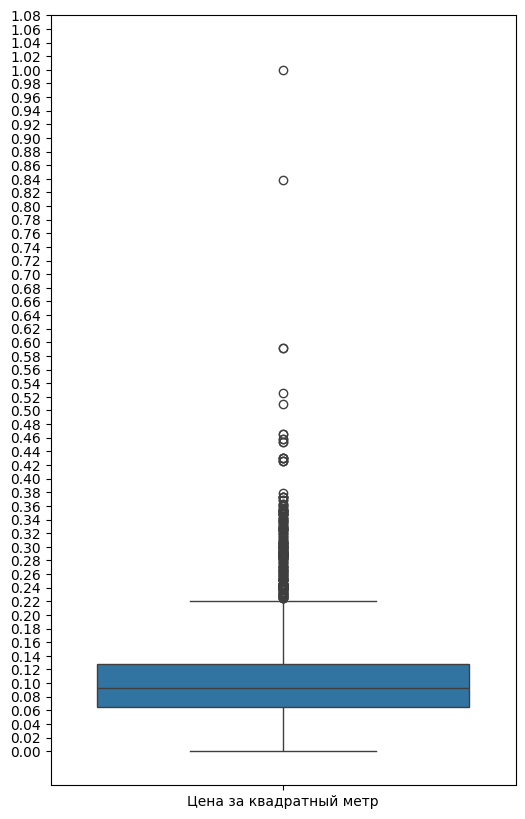

In [ ]:
plt.rcParams['figure.figsize'] = 6, 10
sns.boxplot(ndata[['Цена за квадратный метр']])
plt.yticks(np.arange(0, 1.1, 0.02));

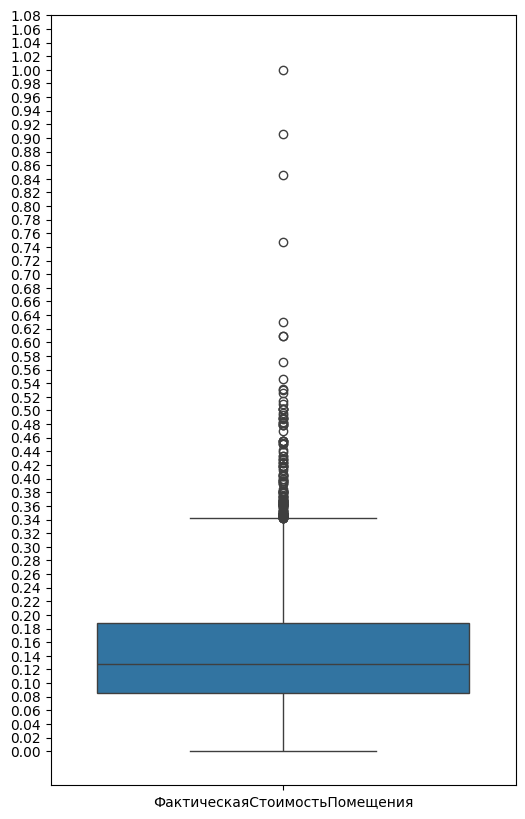

In [ ]:
plt.rcParams['figure.figsize'] = 6, 10
sns.boxplot(ndata[['ФактическаяСтоимостьПомещения']])
plt.yticks(np.arange(0, 1.1, 0.02));

In [45]:
ndata1 = ndata
ndata1 = ndata[(ndata['Тип'] <= 0.8) & (ndata['ПродаваемаяПлощадь'] <= 0.705) & (ndata['Этаж'] <= 0.9) & (ndata['СтоимостьНаДатуБрони'] <= 0.34) & (ndata['Цена за квадратный метр'] <= 0.22) & (ndata['ФактическаяСтоимостьПомещения'] <= 0.34)]
ndata1

,СкидкаНаКвартиру,ИсточникБрони,ВременнаяБронь,СледующийСтатус,Тип,ПродаваемаяПлощадь,Этаж,СтоимостьНаДатуБрони,ТипСтоимости,ВариантОплаты,...,Тюмень,Уфа,Хабаровск,Ярославль,F,N,P,S,Цена за квадратный метр,Скидка в процентах
0,-0.235597,1.0,1.0,0.0,0.428571,0.397864,0.083333,0.104727,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.036205,0.373058
1,-0.235597,1.0,1.0,0.0,0.714286,0.467290,0.041667,0.141803,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.051669,0.373058
2,-0.235597,1.0,1.0,0.0,0.428571,0.339119,0.708333,0.101157,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.047099,0.373058
3,-0.235597,1.0,1.0,0.0,0.428571,0.305296,0.458333,0.146888,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.103442,0.373058
4,-0.235597,1.0,1.0,0.0,0.428571,0.339119,0.708333,0.101157,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.047099,0.373058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,-0.235597,0.0,0.0,0.0,0.285714,0.170895,0.000000,0.074494,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.073061,0.373058
3937,-0.235597,0.0,1.0,0.0,0.571429,0.525145,0.375000,0.227677,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.102670,0.373058
3938,-1.452823,1.0,0.0,0.0,0.314286,0.024032,0.541667,0.032239,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.090041,0.186529
3939,-0.235597,0.0,1.0,0.0,0.142857,0.169114,0.333333,0.112376,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.125528,0.373058


In [46]:
x = ndata1.drop('СледующийСтатус', axis = 1)
y = ndata1['СледующийСтатус']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

modelKN = KNeighborsClassifier()
modelKN.fit(x_train, y_train)

modelT = DecisionTreeClassifier()
modelT.fit(x_train, y_train)

y1_model = modelKN.predict(x_train)
y1_pred = modelKN.predict(x_test)
y2_model = modelT.predict(x_train)
y2_pred = modelT.predict(x_test)

print('Модель с алгоритмом KNN')
print('\nF-мера на обучающей выборке =', f1_score(y_train, y1_model))
print('F-мера на тестовой выборке =', f1_score(y_test, y1_pred))

print('\nPrecision на обучающей выборке =', precision_score(y_train, y1_model))
print('Precision на тестовой выборке = ', precision_score(y_test, y1_pred))

print('\nRecall на обучающей выборке =', recall_score(y_train, y1_model))
print('Recall на тестовой выборке =', recall_score(y_test, y1_pred))

print('\n\nМодель с алгоритмом DecisionTree')
print('\nF-мера на обучающей выборке =', f1_score(y_train, y2_model))
print('F-мера на тестовой выборке =', f1_score(y_test, y2_pred))

print('\nPrecision на обучающей выборке =', precision_score(y_train, y2_model))
print('Precision на тестовой выборке =', precision_score(y_test, y2_pred))

print('\nRecall на обучающей выборке =', recall_score(y_train, y2_model))
print('Recall на тестовой выборке =', recall_score(y_test, y2_pred))

Модель с алгоритмом KNN

F-мера на обучающей выборке = 0.8508771929824561
F-мера на тестовой выборке = 0.7916666666666666

Precision на обучающей выборке = 0.88296488946684
Precision на тестовой выборке =  0.8042328042328042

Recall на обучающей выборке = 0.8210399032648126
Recall на тестовой выборке = 0.7794871794871795


Модель с алгоритмом DecisionTree

F-мера на обучающей выборке = 0.988997555012225
F-мера на тестовой выборке = 0.7692307692307693

Precision на обучающей выборке = 1.0
Precision на тестовой выборке = 0.7692307692307693

Recall на обучающей выборке = 0.9782345828295043
Recall на тестовой выборке = 0.7692307692307693


Предыдущий результат:

Модель с алгоритмом KNN

F-мера на обучающей выборке = 0.8603104212860311
F-мера на тестовой выборке = 0.7637231503579952

Precision на обучающей выборке = 0.8848346636259977
Precision на тестовой выборке =  0.7655502392344498

Recall на обучающей выборке = 0.837108953613808
Recall на тестовой выборке = 0.7619047619047619


Модель с алгоритмом DecisionTree

F-мера на обучающей выборке = 0.9907457811649428
F-мера на тестовой выборке = 0.7554479418886199

Precision на обучающей выборке = 1.0
Precision на тестовой выборке = 0.7684729064039408

Recall на обучающей выборке = 0.9816612729234089
Recall на тестовой выборке = 0.7428571428571429

In [47]:
# 17 Из библиотеки sklearn.linear_model возьмите алгоритм логистической регрессии (LogisticRegression)
# Постройте (обучите) модель
# Посчитайте показатели качества
# Сравните результат с другими моделями
modelL = LogisticRegression()
modelL.fit(x_train, y_train)

yl_model = modelL.predict(x_train)
yl_pred = modelL.predict(x_test)

print('Модель с алгоритмом логистической регрессии')
print('\nF-мера на обучающей выборке =', f1_score(y_train, yl_model))
print('F-мера на тестовой выборке =', f1_score(y_test, yl_pred))

print('\nPrecision на обучающей выборке =', precision_score(y_train, yl_model))
print('Precision на тестовой выборке = ', precision_score(y_test, yl_pred))

print('\nRecall на обучающей выборке =', recall_score(y_train, yl_model))
print('Recall на тестовой выборке =', recall_score(y_test, yl_pred))

Модель с алгоритмом логистической регрессии

F-мера на обучающей выборке = 0.7810026385224275
F-мера на тестовой выборке = 0.7855153203342619

Precision на обучающей выборке = 0.8592162554426706
Precision на тестовой выборке =  0.8597560975609756

Recall на обучающей выборке = 0.7158403869407497
Recall на тестовой выборке = 0.7230769230769231


In [48]:
# 18 Из библиотеки sklearn.svm возьмите алгоритм SVM (машины опорных векторов) (LinearSVC)
# Постройте (обучите) модель
# Посчитайте показатели качества
# Сравните результат с другими моделями
modelS = LinearSVC()
modelS.fit(x_train, y_train)

ys_model = modelS.predict(x_train)
ys_pred = modelS.predict(x_test)

print('Модель с алгоритмом SVC')
print('\nF-мера на обучающей выборке =', f1_score(y_train, ys_model))
print('F-мера на тестовой выборке =', f1_score(y_test, ys_pred))

print('\nPrecision на обучающей выборке =', precision_score(y_train, ys_model))
print('Precision на тестовой выборке = ', precision_score(y_test, ys_pred))

print('\nRecall на обучающей выборке =', recall_score(y_train, ys_model))
print('Recall на тестовой выборке =', recall_score(y_test, ys_pred))

Модель с алгоритмом SVC

F-мера на обучающей выборке = 0.7722772277227723
F-мера на тестовой выборке = 0.7833333333333333

Precision на обучающей выборке = 0.8502906976744186
Precision на тестовой выборке =  0.8545454545454545

Recall на обучающей выборке = 0.7073760580411125
Recall на тестовой выборке = 0.7230769230769231
